In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\X-Note\\Desktop\\fastcampus\\06. 회귀분석\\실습코드'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv("/Users/X-Note/Desktop/fastcampus/06. 회귀분석/data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [16]:
## 가변수 생성
corolla.Fuel_Type.unique()
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [17]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [19]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [20]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [32]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG' : dummy_c})

In [33]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [34]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [35]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


In [36]:
feature_columns = list(mlr_data.columns.difference(['Price']))

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [37]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [38]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [39]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     289.9
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:58:38   Log-Likelihood:                -8455.8
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     971   BIC:                         1.715e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -328.2448    134.727     -2.436      0.015    -592.634     -63.855
Age_08_04         -117.1247      4.183    -28.002      0.000    -125.333    -108.917
Airbag_1             0.0658    249.985      0.000      1.000    -490.507     490.639
Airbag_2            61.4232    137.122      0.448      0.654    -207.666     330.512
Airco              221.9926     95.256      2.330      0.020      35.061     408.924
Automatic          380.3509    173.507      2.192      0.029      39.859     720.842
Automatic_airco   2680.8495    203.080     13.201      0.000    2282.324    3079.375
BOVAG_Guarantee    564.4432    134.368      4.201      0.000     300.758     828.129
Backseat_Divider  -281.4256    138.494     -2.032      0.042    -553.208      -9.644
Boardcomputer     -215.6427    124.346     -1.734      0.083    -459.661      28.376
CD_Player          241.2558    105.333      2.290      0.022      34.549     447.963
CNG              -1245.0744    244.459     -5.093      0.000   -1724.803    -765.346
Central_Lock       -32.3034    147.490     -0.219      0.827    -321.740     257.133
Cylinders           -0.0321      0.002    -13.857      0.000      -0.037      -0.028
Diesel             -51.2253    195.614     -0.262      0.793    -435.100     332.650
Doors               78.1354     42.844      1.824      0.069      -5.942     162.212
Gears              215.5844    218.946      0.985      0.325    -214.078     645.247
Guarantee_Period    87.1328     14.334      6.079      0.000      59.004     115.261
HP                  18.5506      3.785      4.901      0.000      11.122      25.979
KM                  -0.0160      0.001    -11.592      0.000      -0.019      -0.013
Met_Color          -24.3384     80.490     -0.302      0.762    -182.293     133.616
Metallic_Rim       249.6795    102.035      2.447      0.015      49.446     449.913
Mfg_Month         -101.3457     10.740     -9.436      0.000    -122.422     -80.269
Mfg_Year             2.0999      0.857      2.452      0.014       0.419       3.781
Mfr_Guarantee      211.8288     78.817      2.688      0.007      57.157     366.501
Mistlamps         -110.7982    115.749     -0.957      0.339    -337.945     116.348
Petrol            1296.2917    200.960      6.450      0.000     901.925    1690.658
Power_Steering    -202.8450    282.725     -0.717      0.473    -757.667     351.977
Powered_Windows    371.0516    146.976      2.525      0.012      82.624     659.480
Quarterly_Tax       18.3421      1.909      9.610      0.000      14.596      22.088
Radio              612.1239    659.594      0.928      0.354    -682.270    1906.518
Radio_cassette    -703.7557    659.963     -1.066      0.287   -1998.874     591.363
Sport_Model        341.9908     92.809      3.685      0.000     159.861     524.121
Tow_Bar           -215.

## VIF를 통한 다중공선성 확인 

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\X-Note\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\X-Note\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


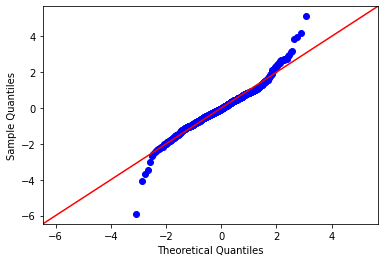

In [47]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

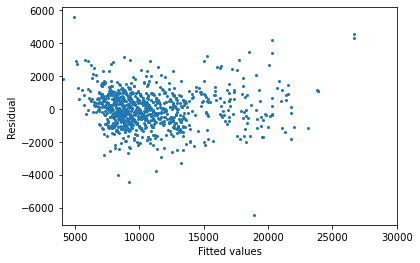

In [42]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)

import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [43]:
 ## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x)

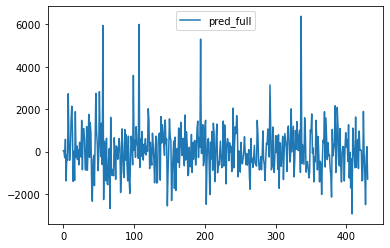

In [44]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1304954.4883613046

# 변수선택법

In [48]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018088594940>, 'AIC': 19101.034102538095}


In [49]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x180885fa610>,
 'AIC': 16979.545274048593}

In [50]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 3.6570332050323486 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17524.9
Name: 211, dtype: object


In [51]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [52]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.44174695014953613 seconds.
Processed  630 models on 2 predictors in 3.51485276222229 seconds.
Processed  7140 models on 3 predictors in 45.26865887641907 seconds.
Total elapsed time: 49.731192111968994 seconds.


In [53]:
models

,AIC,model
1,17785.199993,<statsmodels.regression.linear_model.Regressio...
2,17524.889718,<statsmodels.regression.linear_model.Regressio...
3,17413.846018,<statsmodels.regression.linear_model.Regressio...


In [54]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1880.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:14:18   Log-Likelihood:                -8702.9
No. Observations:                1005   AIC:                         1.741e+04
Df Residuals:                    1001   BIC:                         1.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0234      0.001    -16.276      0.000      -0.026      -0.021
Mfg_Year    1515.7059     39.011     38.853      0.000    1439.152    1592.259
Weight        16.6738      0.949     17.569      0.000      14.811      18.536
const      -3.036e+06   7.75e+04    -39.164      0.000   -3.19e+06   -2.88e+06
==============================================================================
Omnibus:                      200.014   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2034.711
Skew:                          -0.593   Prob(JB):                         0.00
Kurtosis:                       9.869   Cond. No.                     1.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90784
full model AIC:  16979.54527
full model MSE:  12926230.41508
selected model Rsquared:  0.84929
selected model AIC:  17413.84602
selected model MSE:  12926230.41508


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 'argmin' is deprecated, use 

Text(0,0.5,'BIC')

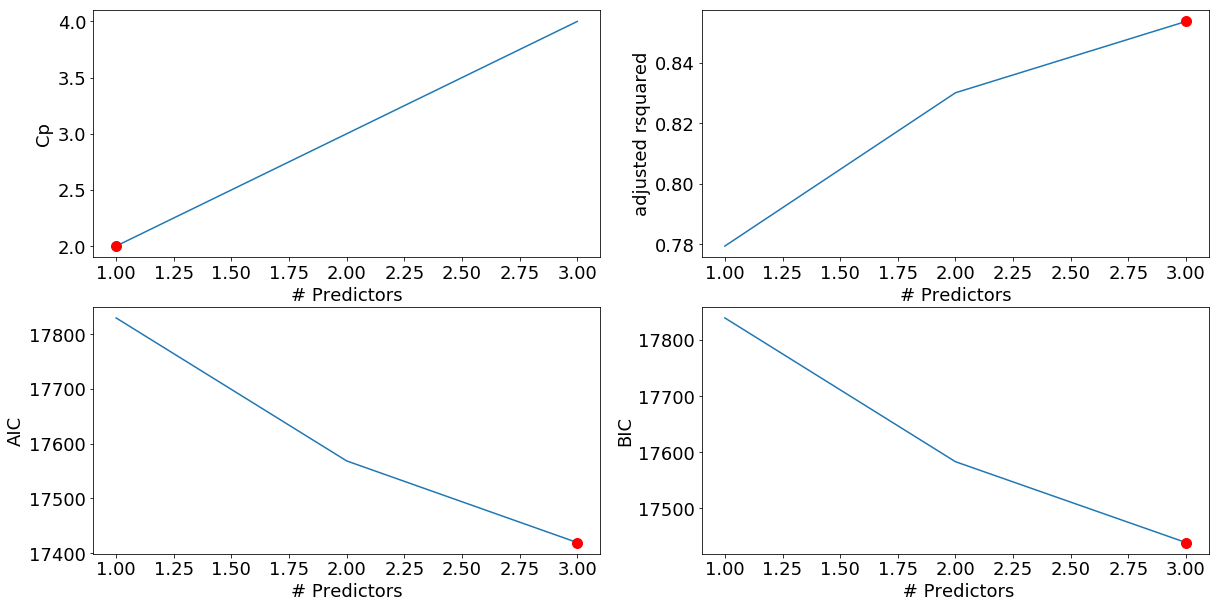

In [188]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [56]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [57]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [58]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.36778950691223145
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018084BF1370>
Processed  35 models on 2 predictors in 0.17689967155456543
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000180884282E0>
Processed  34 models on 3 predictors in 0.4627344608306885
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000180B5FF4BE0>
Processed  33 models on 4 predictors in 0.5546815395355225
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000180884285E0>
Processed  32 models on 5 predictors in 0.15491127967834473
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 

Processed  12 models on 25 predictors in 0.35179972648620605
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'ABS', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'CNG', 'Metallic_Rim', 'CD_Player', 'Automatic', 'Doors', 'Boardcomputer', 'Mfg_Month', 'Diesel', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001808844CE50>
Total elapsed time: 8.039982795715332 seconds.


In [59]:
Forward_best_model.aic

16964.334331566766

In [60]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     418.0
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:19:13   Log-Likelihood:                -8458.2
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     981   BIC:                         1.708e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1409.9503     48.503     29.069      0.000    1314.769    1505.131
Automatic_airco   2616.4111    192.294     13.606      0.000    2239.057    2993.766
KM                  -0.0159      0.001    -11.641      0.000      -0.019      -0.013
Weight               7.4734      1.228      6.088      0.000       5.064       9.882
HP                  18.3573      3.662      5.013      0.000      11.171      25.543
Quarterly_Tax       18.7031      1.857     10.073      0.000      15.059      22.347
Petrol            -7.04e+05   2.42e+04    -29.124      0.000   -7.51e+05   -6.57e+05
Guarantee_Period    85.4306     14.112      6.054      0.000      57.737     113.124
Powered_Windows    306.7357     88.043      3.484      0.001     133.960     479.511
BOVAG_Guarantee    551.3801    131.292      4.200      0.000     293.735     809.025
Sport_Model        377.8574     89.402      4.226      0.000     202.416     553.299
Airco              209.5644     90.740      2.310      0.021      31.498     387.631
ABS               -313.5134    104.913     -2.988      0.003    -519.394    -107.633
Tow_Bar           -224.3073     82.381     -2.723      0.007    -385.971     -62.643
Mfr_Guarantee      214.0507     77.610      2.758      0.006      61.751     366.351
Backseat_Divider  -303.5426    122.481     -2.478      0.013    -543.898     -63.187
CNG              -7.067e+05   2.42e+04    -29.206      0.000   -7.54e+05   -6.59e+05
Metallic_Rim       246.8022     95.541      2.583      0.010      59.314     434.291
CD_Player          248.5195    101.350      2.452      0.014      49.632     447.407
Automatic          348.4028    170.393      2.045      0.041      14.027     682.779
Doors               64.7525     41.639      1.555      0.120     -16.959     146.464
Boardcomputer     -195.4713    122.404     -1.597      0.111    -435.674      44.732
Mfg_Month           16.2746     10.599      1.535      0.125      -4.525      37.074
Diesel           -7.055e+05   2.42e+04    -29.186      0.000   -7.53e+05   -6.58e+05
const            -2.116e+06   7.25e+04    -29.173      0.000   -2.26e+06   -1.97e+06
==============================================================================
Omnibus:                       75.308   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.814
Skew:                           0.121   Prob(JB):                     2.97e-76
Kurtosis:                       5.872   Cond. No.                     2.36e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-28. This might indicate that there are
strong multicollinearity problems or that the design 

# 후진소거법

In [61]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [62]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [63]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.5276975631713867
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018088581C70>
Processed  35 models on 34 predictors in 0.6356379985809326
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year'

In [64]:
Backward_best_model.aic

16964.334331566755

# 단계적 선택법

In [65]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [66]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.40576910972595215
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000180885949A0>
forward
Processed  1 models on 0 predictors in 0.03898024559020996
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018088581250>
Processed  35 models on 2 predictors in 0.5309269428253174
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000180885941C0>
forward
Processed  2 models on 1 predictors in 0.014990568161010742
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001808859AE80>
Processed  34 models on 3 predictors in 1.8399724960327148
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.Regre

Processed  21 models on 16 predictors in 0.2468562126159668
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'ABS', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001808854B070>
forward
Processed  16 models on 15 predictors in 0.15490961074829102
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001808859A550>
Processed  20 models on 17 predictors in 0.2308971881866455
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Pow

forward
Processed  25 models on 24 predictors in 0.5122668743133545
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'ABS', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'CNG', 'Metallic_Rim', 'CD_Player', 'Automatic', 'Doors', 'Boardcomputer', 'Mfg_Month', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001808854B8E0>
backward
Processed  12 models on 25 predictors in 0.1319260597229004
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'ABS', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'CNG', 'Metallic_Rim', 'CD_Player', 'Automatic', 'Doors', 'Boardcomputer', 'Mfg_Month', 'Diesel', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResults

Processed  25 models on 24 predictors in 0.4362447261810303
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'ABS', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'CNG', 'Metallic_Rim', 'CD_Player', 'Automatic', 'Doors', 'Boardcomputer', 'Mfg_Month', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000180884DBDF0>
backward
Processed  12 models on 25 predictors in 0.3393521308898926
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Powered_Windows', 'BOVAG_Guarantee', 'Sport_Model', 'Airco', 'ABS', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'CNG', 'Metallic_Rim', 'CD_Player', 'Automatic', 'Doors', 'Boardcomputer', 'Mfg_Month', 'Diesel', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper 

In [67]:
Stepwise_best_model.aic

16964.334331566766

# 성능평가 

In [68]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (24,) (25,)


In [69]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [70]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [71]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [72]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL     FORWARD    BACKWARD    STEPWISE
MSE   1.30495e+06  1.2973e+06  1.2973e+06  1.2973e+06
RMSE      1142.35     1138.99     1138.99     1138.99
MAE       834.942     832.164     832.164     832.164
MAPE      8.03967     8.02389     8.02389     8.02389


In [73]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
25
24
25
